In [1]:
from Utils import *

In [2]:
# load test data
testImages, testOutputxi, testOutputyi, testOutputxw, testOutputyw = readImageData('Test')

In [3]:
# normalizing pixel values
testImagesNormalized = np.array(testImages) / 255.0

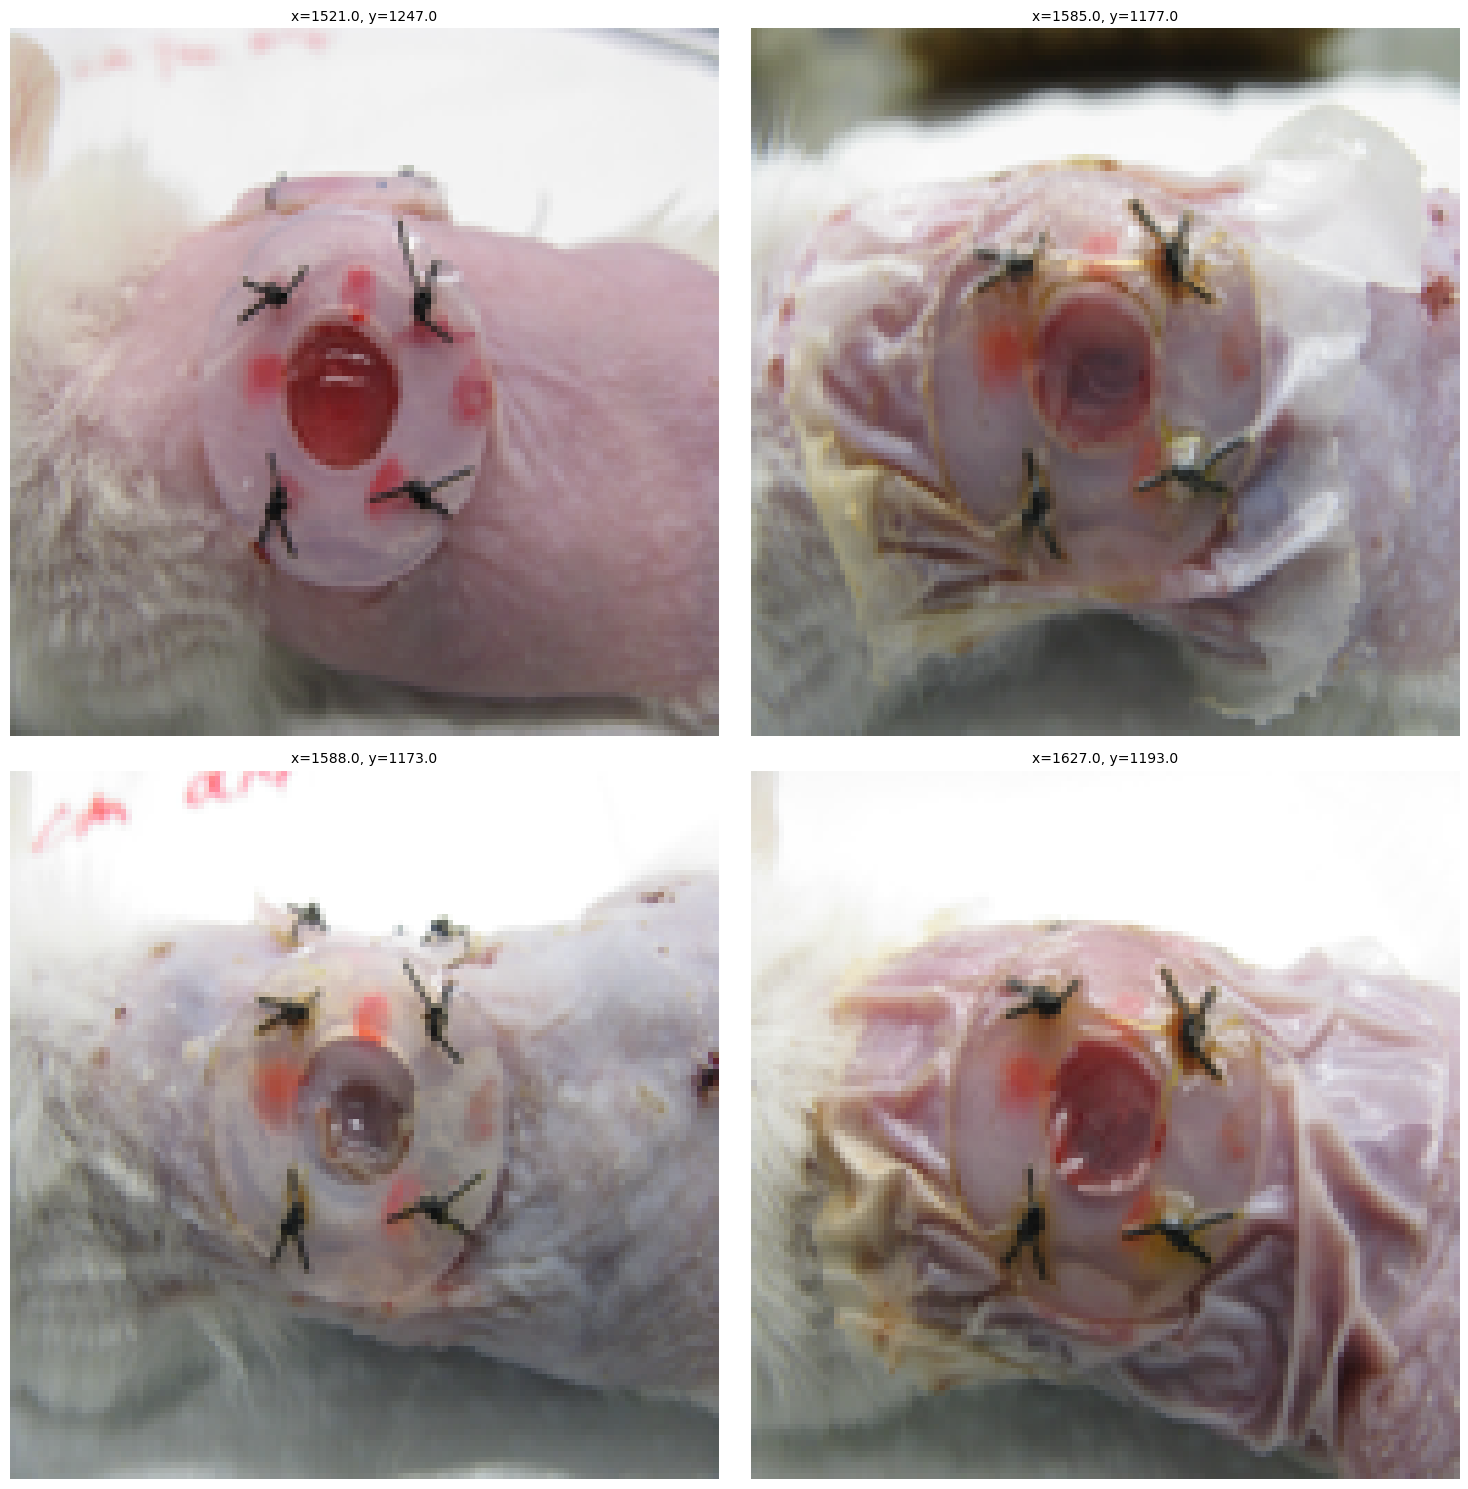

In [4]:
# show some test images
titles = [f"x={x}, y={y}" for x, y in zip(testOutputxi[:4], testOutputyi[:4])]
display_images(testImages[:16], rows=2, cols=2, titles=titles)

In [5]:
import os

# Folder where the models are stored
model_folder = "linear_regression_models"

# List all the model files in the folder
model_files = [f for f in os.listdir(model_folder) if f.endswith(".pkl")]

In [6]:
# Prepare the Outputs
testOutputs = np.array([
    testOutputxi,  # x values
    testOutputyi,  # y values
    testOutputxw,  # x_width values
    testOutputyw   # y_width values
], dtype=float).T  # Transpose to align correctly

In [7]:
# Flatten the test images
testImages_flattened = [img.flatten() for img in testImagesNormalized]
testImages_flattened = np.array(testImages_flattened)

In [8]:
# Visualize predictions and ground truth on a sample test image
original_size = (3264, 2448)  # Original image dimensions
resized_size = (128, 128)     # Resized image dimensions
scale_factor_x = resized_size[0] / original_size[0]
scale_factor_y = resized_size[1] / original_size[1]

In [9]:
import joblib

# Load the scaler
scaler_path = "linear_regression_scalers/scaler.pkl"
scaler = joblib.load(scaler_path)
testImages_scaled = scaler.transform(testImages_flattened)

Loaded model: linear_regression_simple_model.pkl
Performance metrics for linear_regression_simple_model.pkl:
Mean Squared Error: 859.47
Mean Absolute Error: 21.92
R² Score: 0.42


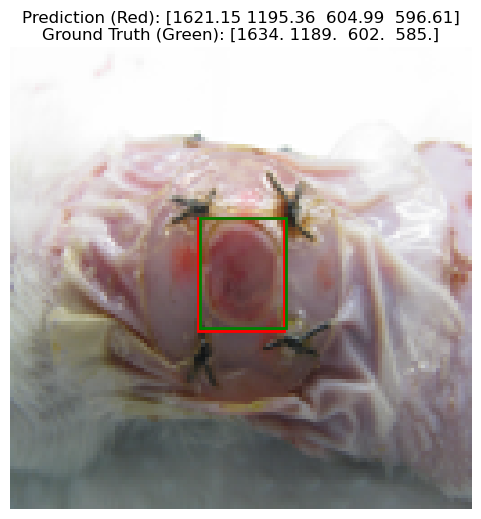

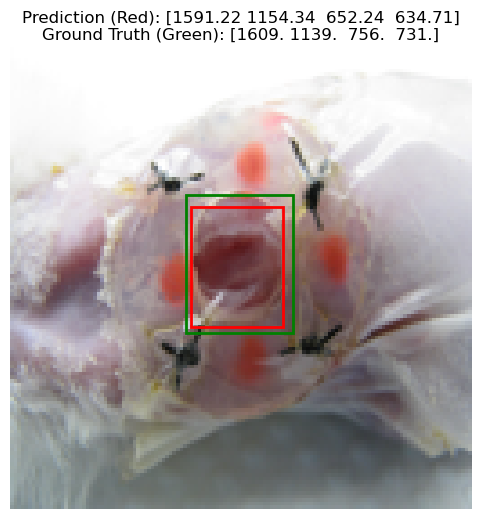

Loaded model: ridge_model_alpha_0.01.pkl
Performance metrics for ridge_model_alpha_0.01.pkl:
Mean Squared Error: 888.07
Mean Absolute Error: 22.36
R² Score: 0.42


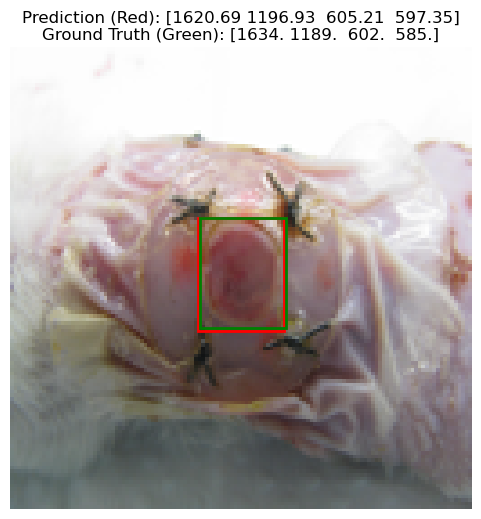

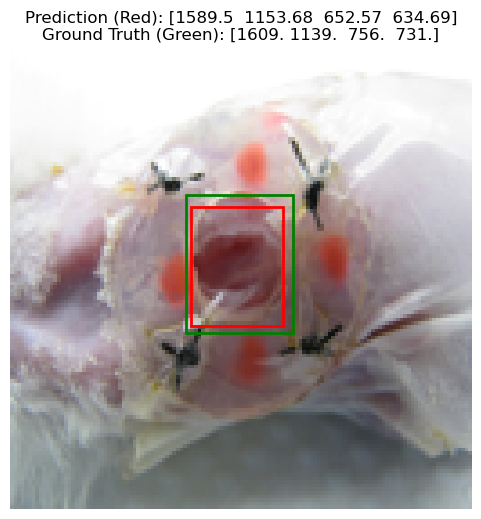

Loaded model: ridge_model_alpha_0.1.pkl
Performance metrics for ridge_model_alpha_0.1.pkl:
Mean Squared Error: 888.07
Mean Absolute Error: 22.36
R² Score: 0.42


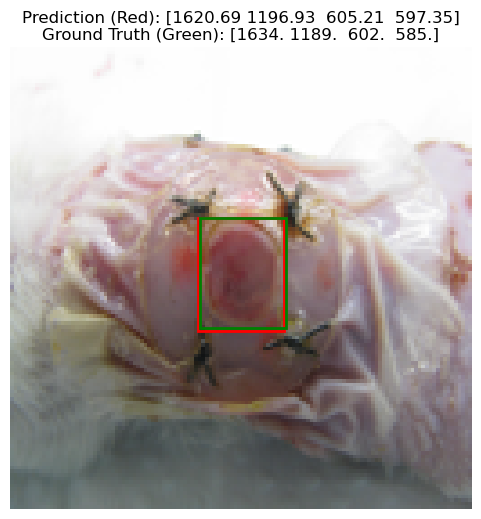

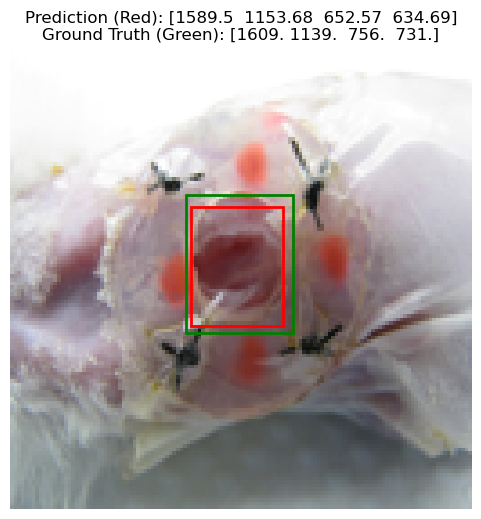

Loaded model: ridge_model_alpha_1.0.pkl
Performance metrics for ridge_model_alpha_1.0.pkl:
Mean Squared Error: 888.08
Mean Absolute Error: 22.36
R² Score: 0.42


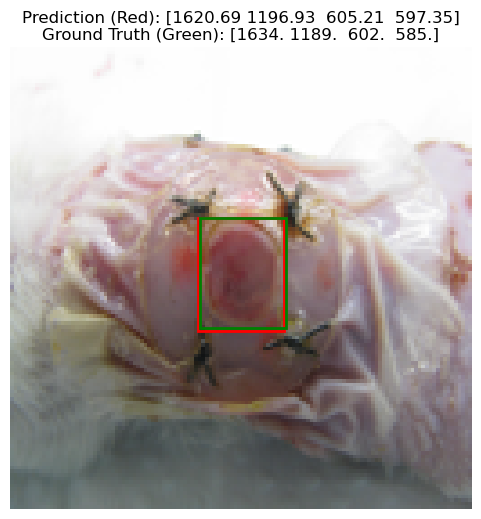

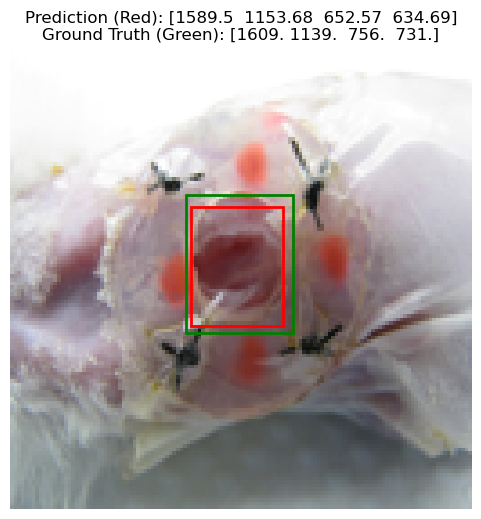

Loaded model: ridge_model_alpha_10.0.pkl
Performance metrics for ridge_model_alpha_10.0.pkl:
Mean Squared Error: 888.14
Mean Absolute Error: 22.36
R² Score: 0.42


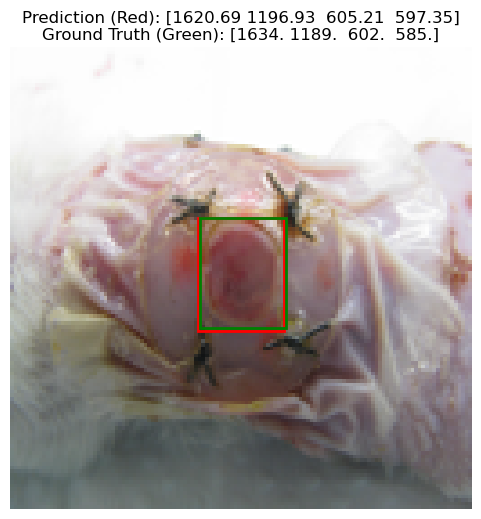

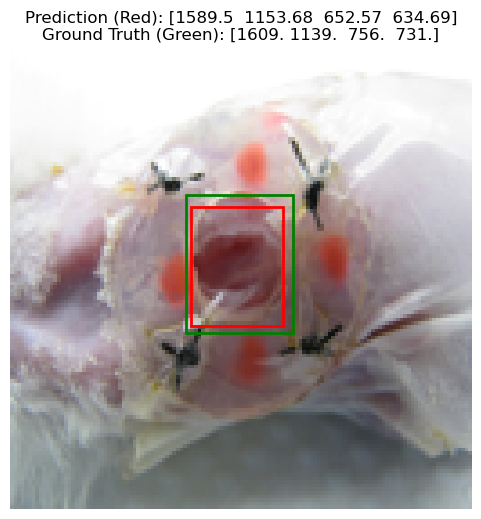

Loaded model: ridge_model_alpha_100.0.pkl
Performance metrics for ridge_model_alpha_100.0.pkl:
Mean Squared Error: 888.70
Mean Absolute Error: 22.35
R² Score: 0.42


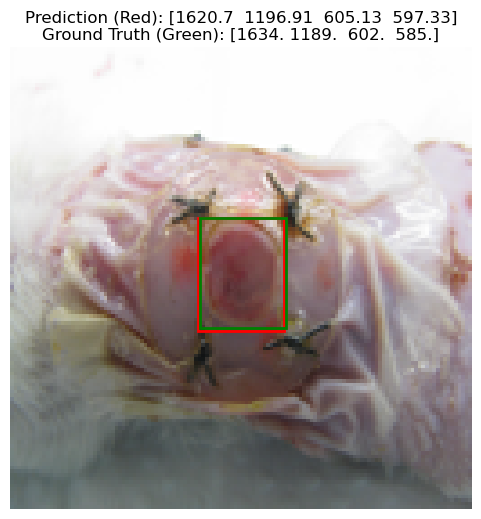

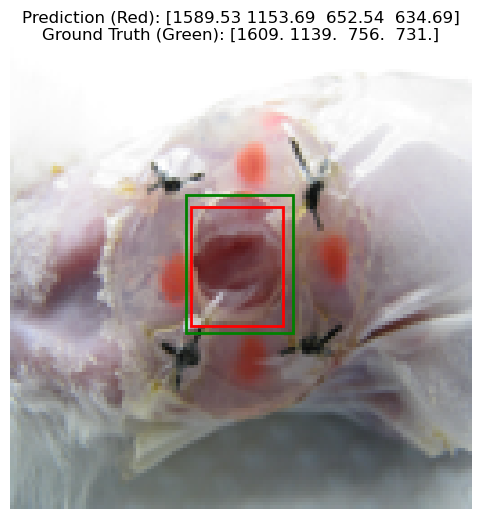

Loaded model: ridge_model_alpha_1000.0.pkl
Performance metrics for ridge_model_alpha_1000.0.pkl:
Mean Squared Error: 894.53
Mean Absolute Error: 22.33
R² Score: 0.41


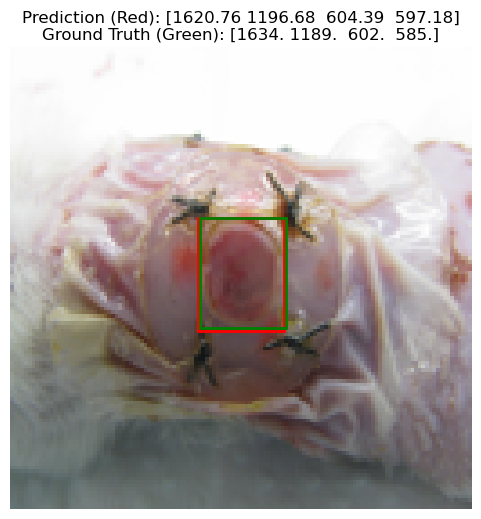

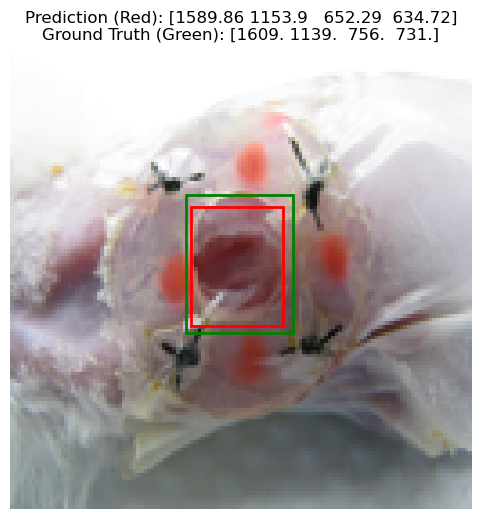

In [11]:
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Iterate over each model file and load it
for model_file in model_files:
    model_path = os.path.join(model_folder, model_file)

    # Load the model
    model = joblib.load(model_path)
    print(f"Loaded model: {model_file}")
    # Make predictions with the loaded model
    if model_file == 'linear_regression_simple_model.pkl':
        predictions = model.predict(testImages_flattened)
    else:
        predictions = model.predict(testImages_scaled)
    
    # Calculate performance metrics
    mse = mean_squared_error(testOutputs, predictions)
    mae = mean_absolute_error(testOutputs, predictions)
    r2 = r2_score(testOutputs, predictions)
    
    print(f"Performance metrics for {model_file}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R² Score: {r2:.2f}")

    # Calculate the errors for all predictions
    errors = []
    for i in range(len(testImages)):
        pred = predictions[i]
        gt = testOutputs[i]
        error = calculate_error(pred, gt)
        errors.append((i, error))

    # Sort the errors by ascending order (low error to high error)
    errors.sort(key=lambda x: x[1])

        
    # Select well-predicted images (low error) and hard-to-predict images (high error)
    num_images = 1  # Number of images to display
    well_predicted_indices = [errors[i][0] for i in range(num_images)]  # First 3 with lowest error
    hard_predicted_indices = [errors[-i-1][0] for i in range(num_images)]  # First 3 with highest error

    # Combine indices for mixed display
    selected_indices = well_predicted_indices + hard_predicted_indices
            
    for i in selected_indices:
        img = testImages[i]
        pred = predictions[i]
        gt = testOutputs[i]  # Replace with your ground truth list or array
    
        # Unpack predictions and ground truth
        pred_x, pred_y, pred_xw, pred_yw = pred
        gt_x, gt_y, gt_xw, gt_yw = gt
    
        # Create a plot
        fig, ax = plt.subplots(1, figsize=(6, 6))
        ax.imshow(img, cmap='gray')  # Display the image
        
        # Draw the predicted rectangle (red)
        draw_rectangle(ax, pred_x, pred_y, pred_xw, pred_yw, 'red', scale_factor_x, scale_factor_y)
    
        # Draw the ground truth rectangle (green)
        draw_rectangle(ax, gt_x, gt_y, gt_xw, gt_yw, 'green', scale_factor_x, scale_factor_y)
    
        plt.title(f"Prediction (Red): {np.round(pred, 2)}\nGround Truth (Green): {gt}")
        plt.axis('off')
        plt.savefig(f'results/{model_file}_visualization_{i}.jpg')
        plt.show()